In [8]:
import os
from io import StringIO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from darts import TimeSeries

## Lendo o arquivo em parquet

In [9]:
df = pd.read_parquet(
    os.path.join(os.pardir, "data", "results", "uni_all_stats.parquet")
)

In [16]:
data = df.reset_index()

In [19]:
data

,Model,target,Activity,MAE_Min,MAE_1Q,MAE_Median,MAE_3Q,MAE_Max,MAE_Mean,RMSE_Min,...,RMSE_Median,RMSE_3Q,RMSE_Max,RMSE_Mean,MSE_Min,MSE_1Q,MSE_Median,MSE_3Q,MSE_Max,MSE_Mean
0,Naive,CQI,static_strm,0.000000,0.749132,0.908980,1.240161,1.959009,0.918565,0.000000,...,1.824856,2.125874,3.061473,1.622463,0.000000,2.391430,3.333634,4.520008,9.372619,3.481508
1,Naive,RSRP,static_strm,0.000000,0.492291,0.639074,0.789102,3.310714,0.844282,0.000000,...,1.115906,1.434237,18.466282,2.263261,0.000000,0.691626,1.246392,2.060968,341.003571,21.697838
2,Naive,RSRQ,static_strm,0.000000,1.124016,1.609693,1.741406,1.990833,1.253969,0.000000,...,2.231961,2.352573,2.780513,1.755961,0.000000,2.981293,4.981663,5.535239,7.731250,3.975070
3,Naive,RSSI,static_strm,0.497923,0.879528,1.014759,1.091823,2.914161,1.116069,1.023011,...,1.736799,2.197757,4.666222,2.030000,1.046552,2.149072,3.020813,4.842653,21.773628,5.065074
4,Naive,SNR,static_strm,0.000000,2.154209,3.524877,4.009537,4.699537,2.795619,0.000000,...,4.950212,5.400741,6.112620,3.799598,0.000000,10.295845,24.504642,29.168644,37.364120,19.049076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Prophet,CQI,driving_down,0.365483,1.412602,1.755108,2.367074,3.510989,1.844936,0.846729,...,2.709231,3.061355,4.340733,2.585203,0.716949,5.028153,7.339933,9.376782,18.841965,7.443859
176,Prophet,RSRP,driving_down,3.491890,3.976576,4.293343,5.226360,5.936236,4.535163,4.858548,...,6.170250,7.223269,8.532295,6.305426,23.605485,29.266044,38.080364,52.179463,72.800066,40.961931
177,Prophet,RSRQ,driving_down,0.000000,1.164315,1.761108,1.907223,2.281021,1.448875,0.000000,...,2.304207,2.602183,3.464508,2.138882,0.000000,2.904028,5.309862,6.771817,12.002817,5.303359
178,Prophet,RSSI,driving_down,0.784799,2.628350,4.040310,5.557549,5.846841,3.868085,2.105435,...,5.790833,7.629110,9.319049,5.999491,4.432856,21.132300,33.533742,58.210717,86.844677,39.623416


## Bar plots das médias.

In [27]:
def plot_bar_for_means_by_target(df):
    """
    Gera bar plots para as métricas MAE_Mean, RMSE_Mean e MSE_Mean, separadas por cada target único no DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame que contém os dados para os bar plots.

    Retorna:
    None: Exibe os bar plots de MAE_Mean, RMSE_Mean e MSE_Mean para cada target único.
    """
    # Obtendo os targets únicos
    targets = df['target'].unique()
    
    # Lista de métricas que serão plotadas
    metrics = ['MAE_Mean', 'RMSE_Mean', 'MSE_Mean']
    
    # Iterar sobre cada target único
    for target in targets:
        # Filtrando os dados para o target específico
        target_data = df[df['target'] == target]
        
        # Iterar sobre cada métrica
        for metric in metrics:
            # Plotando o barplot para o target e métrica específicos
            plt.figure(figsize=(10, 6))
            sns.barplot(data=target_data, x='Activity', y=metric, hue='Model')
            
            # Ajustando título e rótulos dos eixos
            plt.title(f'Bar Plot of {metric} for target: {target}')
            plt.ylabel(metric)
            plt.xlabel('Model')
            
            # Exibindo o gráfico
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

In [20]:
data = data[data['Model'] != 'LinearRegression']
data


,Model,target,Activity,MAE_Min,MAE_1Q,MAE_Median,MAE_3Q,MAE_Max,MAE_Mean,RMSE_Min,...,RMSE_Median,RMSE_3Q,RMSE_Max,RMSE_Mean,MSE_Min,MSE_1Q,MSE_Median,MSE_3Q,MSE_Max,MSE_Mean
0,Naive,CQI,static_strm,0.000000,0.749132,0.908980,1.240161,1.959009,0.918565,0.000000,...,1.824856,2.125874,3.061473,1.622463,0.000000,2.391430,3.333634,4.520008,9.372619,3.481508
1,Naive,RSRP,static_strm,0.000000,0.492291,0.639074,0.789102,3.310714,0.844282,0.000000,...,1.115906,1.434237,18.466282,2.263261,0.000000,0.691626,1.246392,2.060968,341.003571,21.697838
2,Naive,RSRQ,static_strm,0.000000,1.124016,1.609693,1.741406,1.990833,1.253969,0.000000,...,2.231961,2.352573,2.780513,1.755961,0.000000,2.981293,4.981663,5.535239,7.731250,3.975070
3,Naive,RSSI,static_strm,0.497923,0.879528,1.014759,1.091823,2.914161,1.116069,1.023011,...,1.736799,2.197757,4.666222,2.030000,1.046552,2.149072,3.020813,4.842653,21.773628,5.065074
4,Naive,SNR,static_strm,0.000000,2.154209,3.524877,4.009537,4.699537,2.795619,0.000000,...,4.950212,5.400741,6.112620,3.799598,0.000000,10.295845,24.504642,29.168644,37.364120,19.049076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Prophet,CQI,driving_down,0.365483,1.412602,1.755108,2.367074,3.510989,1.844936,0.846729,...,2.709231,3.061355,4.340733,2.585203,0.716949,5.028153,7.339933,9.376782,18.841965,7.443859
176,Prophet,RSRP,driving_down,3.491890,3.976576,4.293343,5.226360,5.936236,4.535163,4.858548,...,6.170250,7.223269,8.532295,6.305426,23.605485,29.266044,38.080364,52.179463,72.800066,40.961931
177,Prophet,RSRQ,driving_down,0.000000,1.164315,1.761108,1.907223,2.281021,1.448875,0.000000,...,2.304207,2.602183,3.464508,2.138882,0.000000,2.904028,5.309862,6.771817,12.002817,5.303359
178,Prophet,RSSI,driving_down,0.784799,2.628350,4.040310,5.557549,5.846841,3.868085,2.105435,...,5.790833,7.629110,9.319049,5.999491,4.432856,21.132300,33.533742,58.210717,86.844677,39.623416


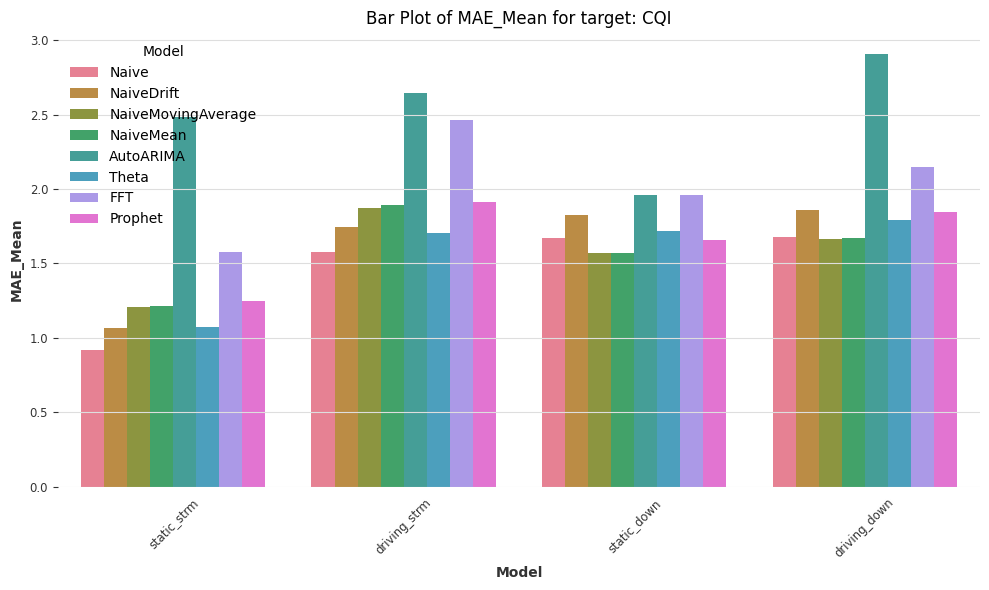

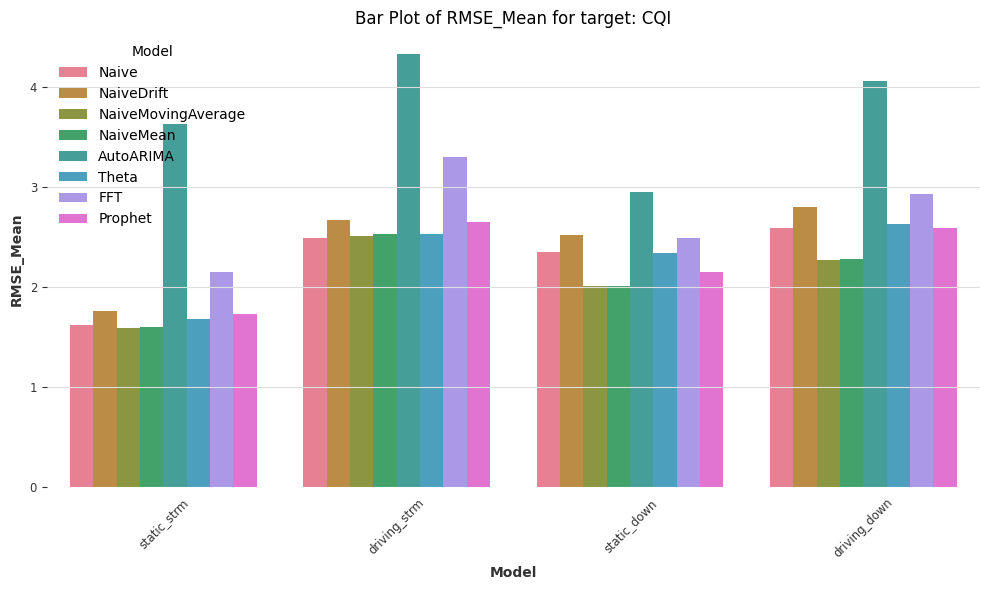

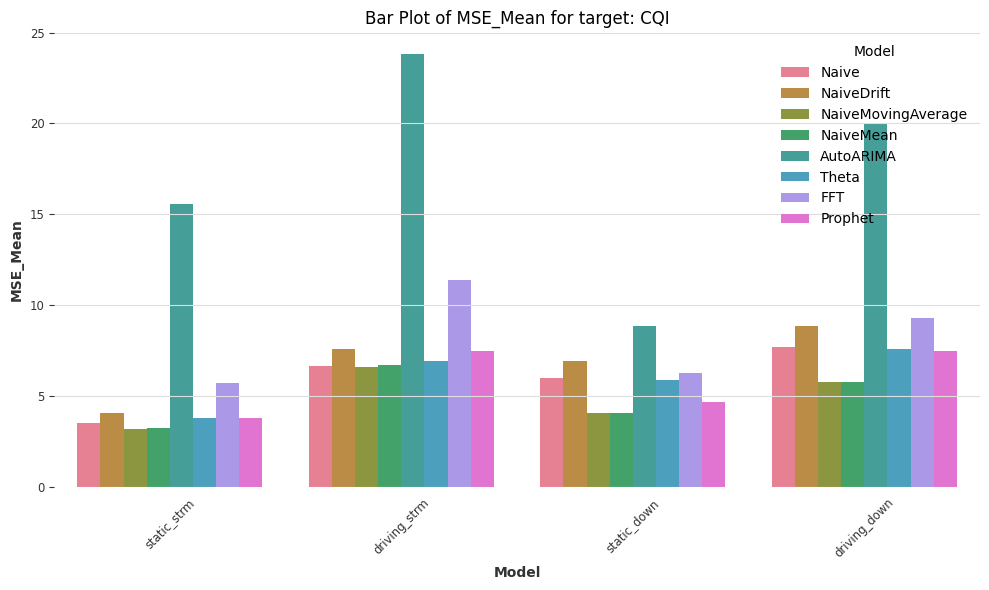

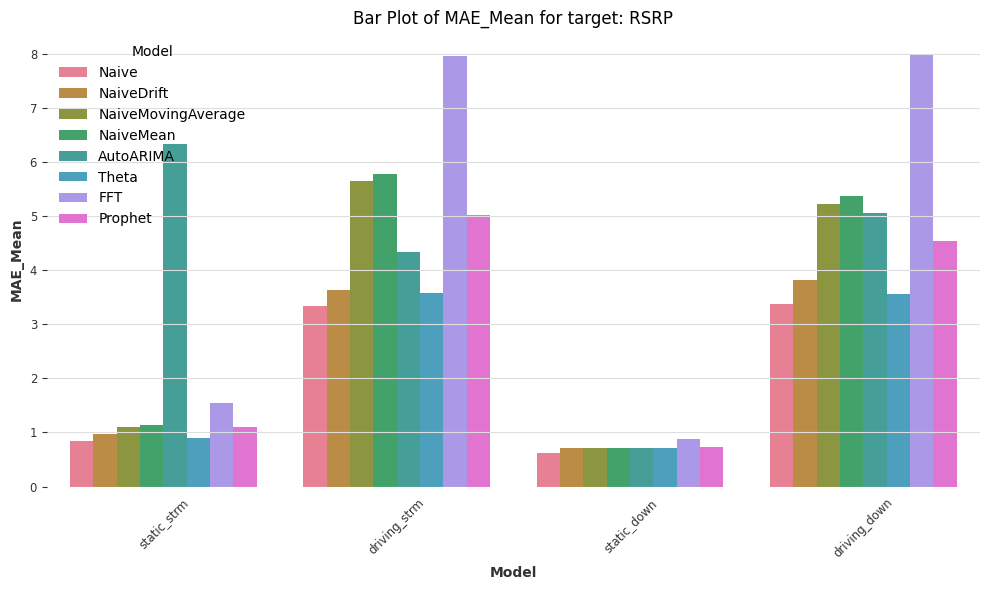

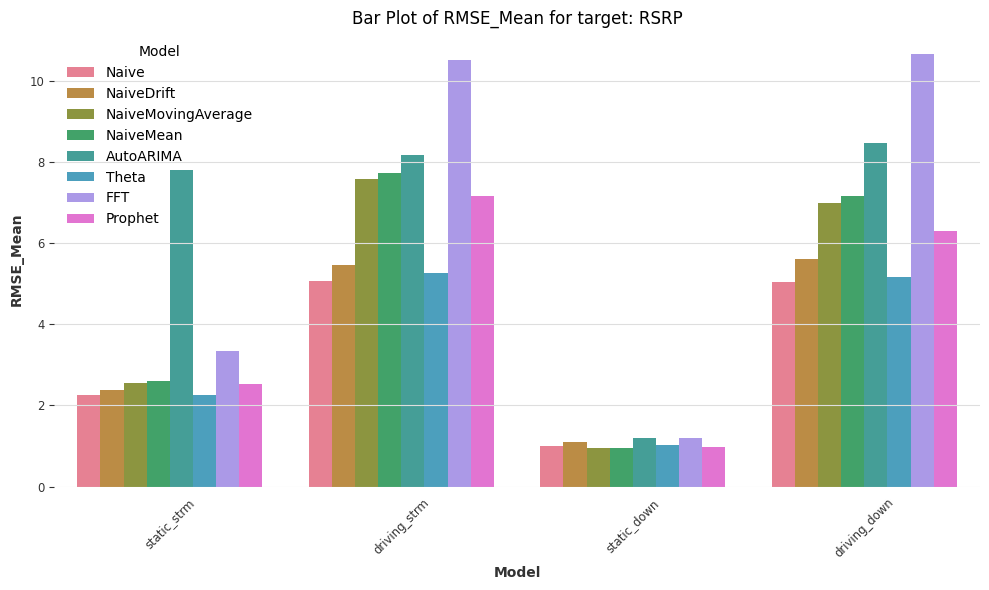

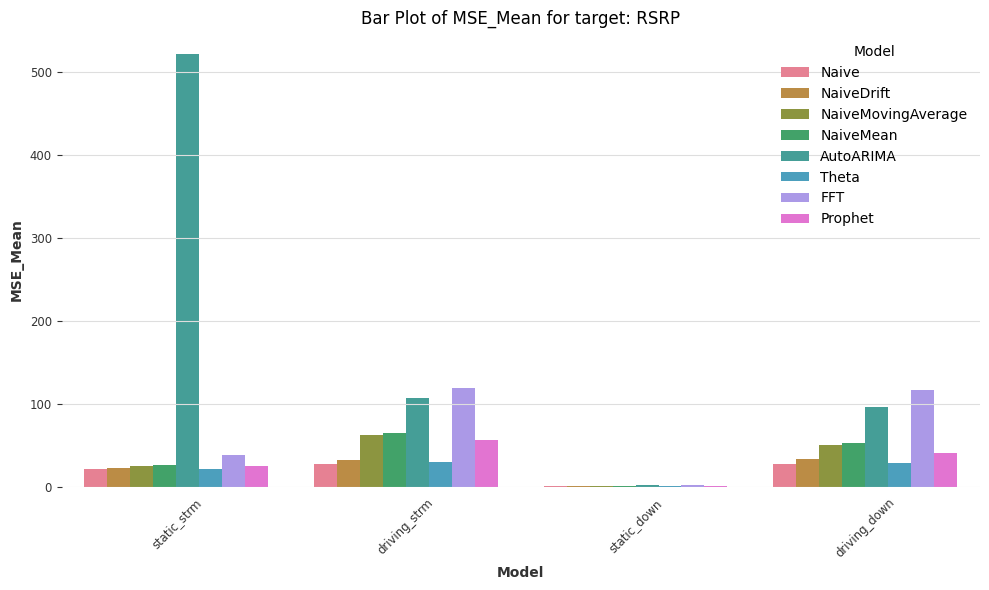

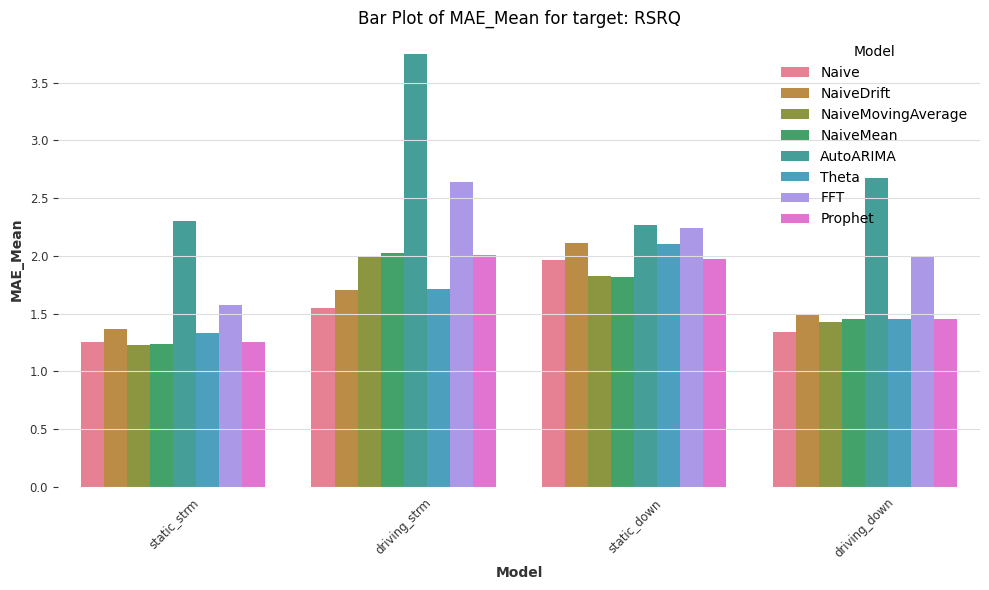

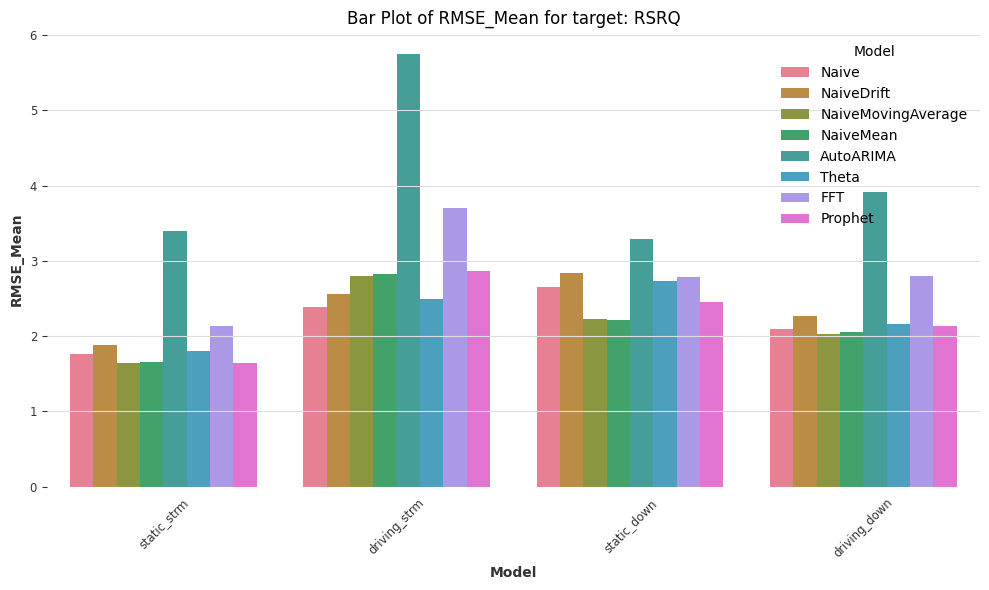

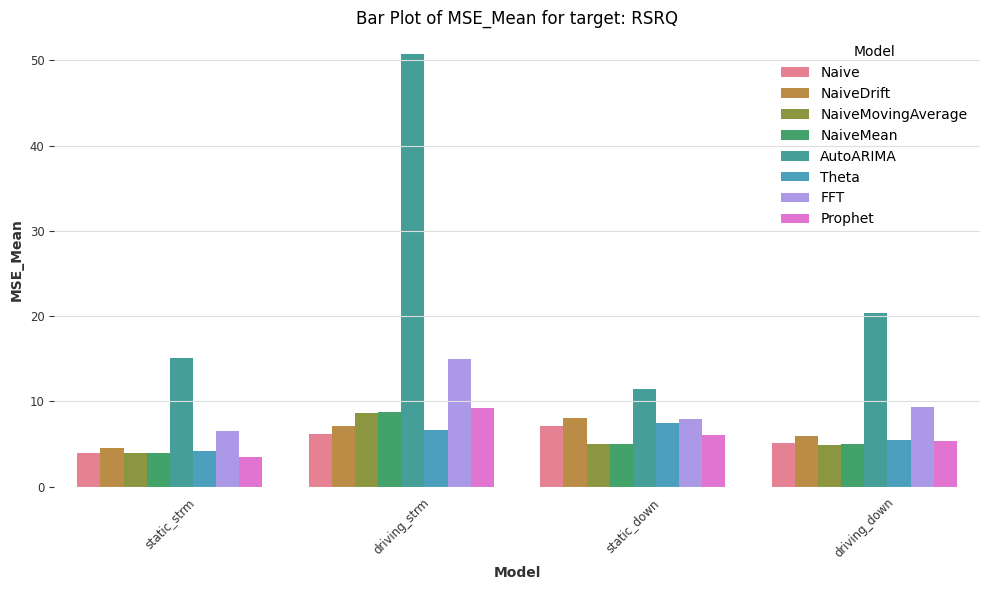

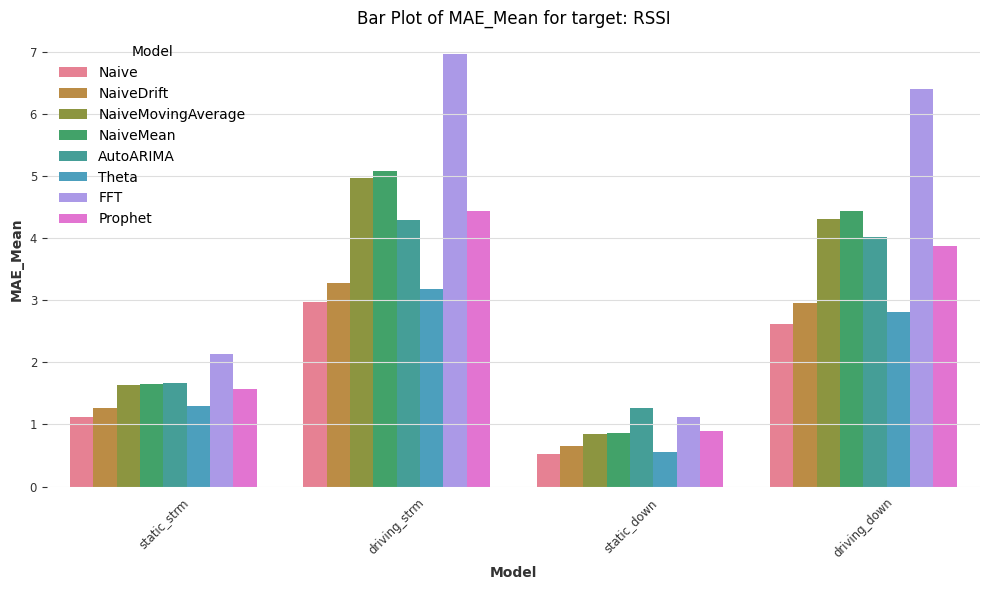

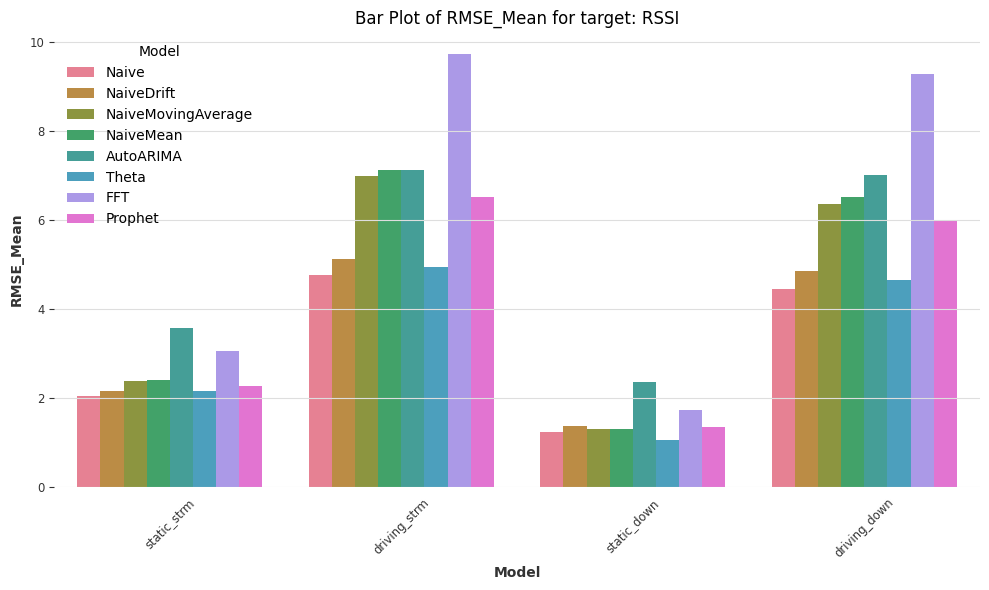

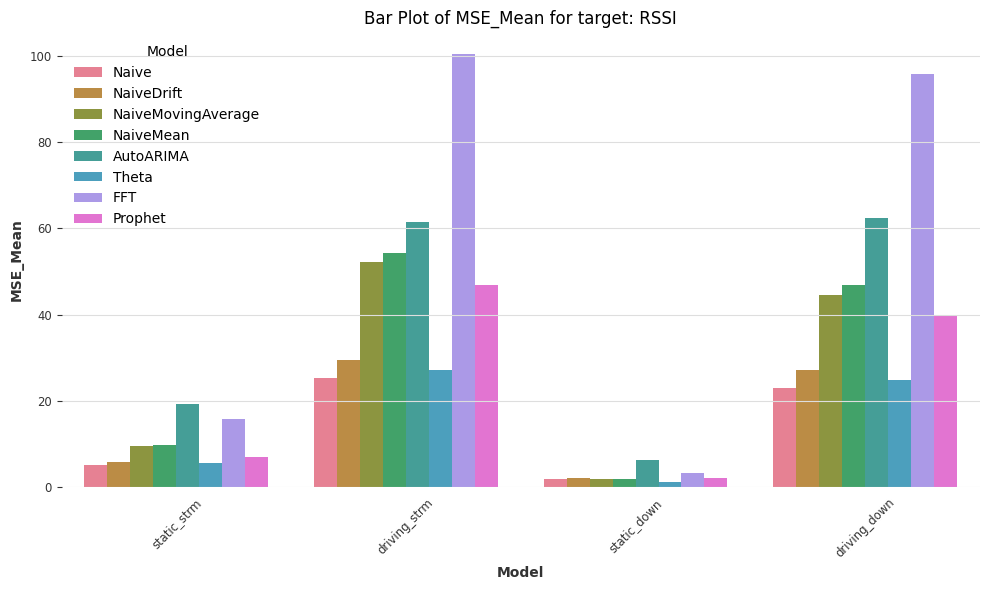

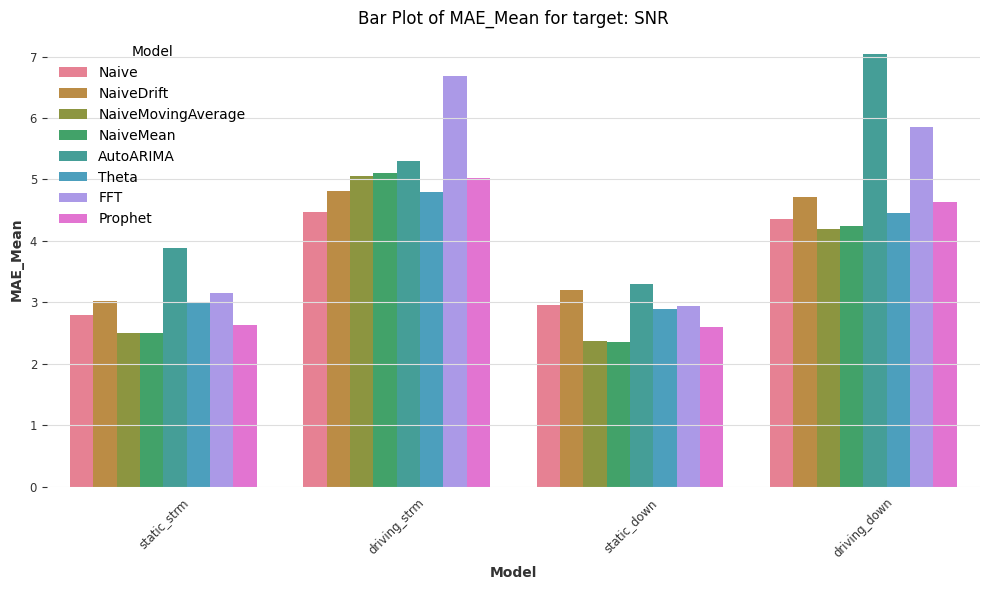

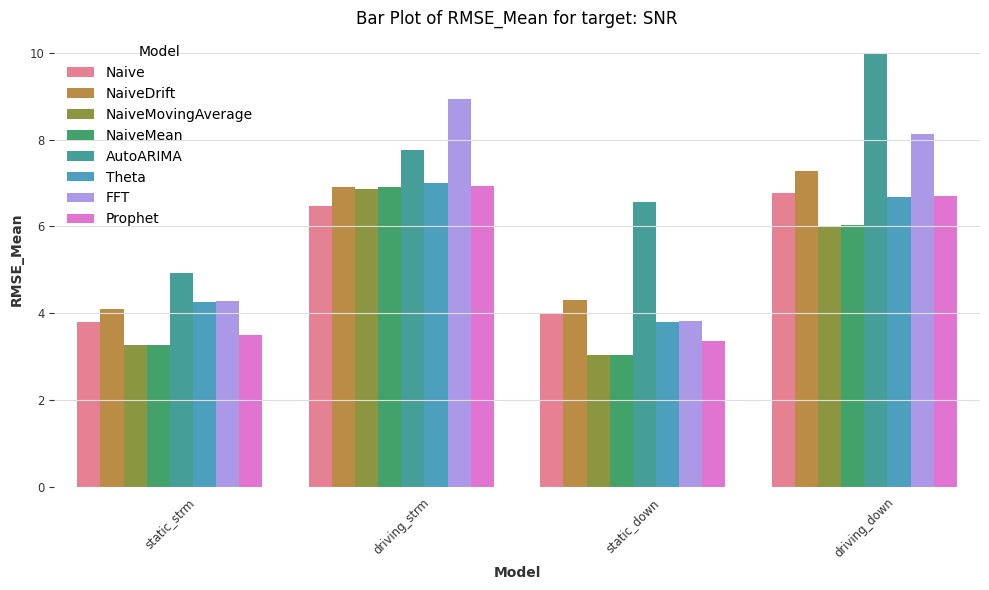

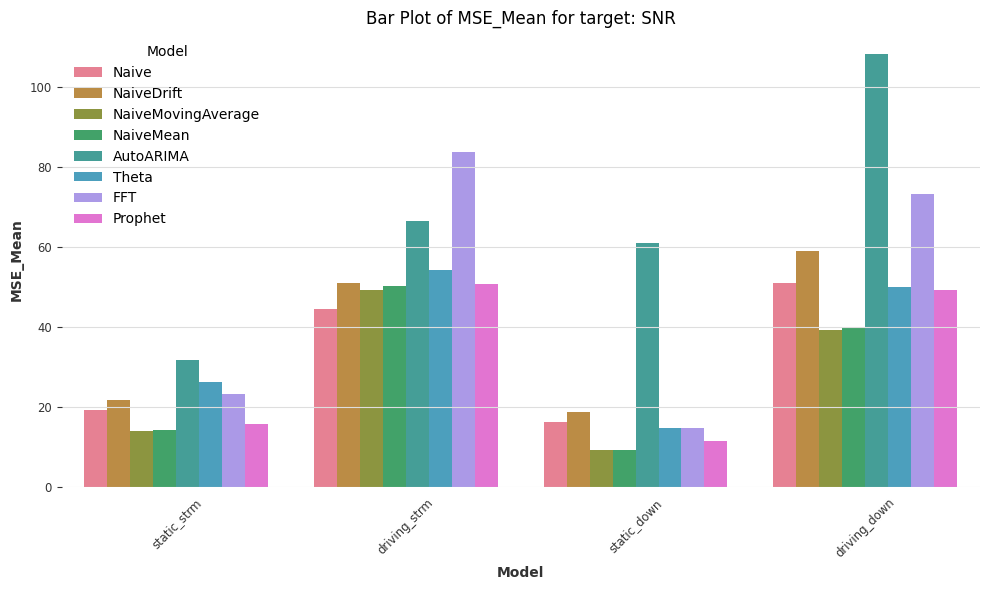

In [28]:
plot_bar_for_means_by_target(data)

## Boxplot das métricas

In [2]:
def plot_box_for_row(row):
    """
    Gera um box plot para uma linha específica do DataFrame.

    Parâmetros:
    row (pd.Series): A linha do DataFrame que contém os dados para o box plot.

    Retorna:
    None: Exibe o box plot.
    """
    metrics = {
        "MAE": [
            row["MAE_Min"],
            row["MAE_1Q"],
            row["MAE_Median"],
            row["MAE_3Q"],
            row["MAE_Max"],
        ],
        "RMSE": [
            row["RMSE_Min"],
            row["RMSE_1Q"],
            row["RMSE_Median"],
            row["RMSE_3Q"],
            row["RMSE_Max"],
        ],
        "MSE": [
            row["MSE_Min"],
            row["MSE_1Q"],
            row["MSE_Median"],
            row["MSE_3Q"],
            row["MSE_Max"],
        ],
    }

    fig, ax = plt.subplots()
    ax.boxplot(
        metrics.values(), tick_labels=metrics.keys()
    )  # Atualização do nome do parâmetro

    ax.set_title(f"Box Plot for {row['Model']} - {row['target']} - {row['Activity']}")
    ax.set_ylabel("Values")

    plt.show()

In [21]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_box_for_dataframe(df):
    """
    Gera box plots para um DataFrame com múltiplas linhas.

    Parâmetros:
    df (pd.DataFrame): O DataFrame que contém os dados para os box plots.

    Retorna:
    None: Exibe os box plots para cada combinação de Model, target e Activity.
    """
    # List of unique combinations of Model, target, and Activity
    unique_combinations = df[["Model", "target", "Activity"]].drop_duplicates()

    for _, row in unique_combinations.iterrows():
        model = row["Model"]
        target = row["target"]
        activity = row["Activity"]

        # Filtrando o DataFrame para a combinação específica
        filtered_data = df[
            (df["Model"] == model)
            & (df["target"] == target)
            & (df["Activity"] == activity)
        ]

        # Definindo os valores de métricas para MAE, RMSE e MSE
        metrics = {
            "MAE": [
                filtered_data["MAE_Min"].values,
                filtered_data["MAE_1Q"].values,
                filtered_data["MAE_Median"].values,
                filtered_data["MAE_3Q"].values,
                filtered_data["MAE_Max"].values,
            ],
            "RMSE": [
                filtered_data["RMSE_Min"].values,
                filtered_data["RMSE_1Q"].values,
                filtered_data["RMSE_Median"].values,
                filtered_data["RMSE_3Q"].values,
                filtered_data["RMSE_Max"].values,
            ],
            "MSE": [
                filtered_data["MSE_Min"].values,
                filtered_data["MSE_1Q"].values,
                filtered_data["MSE_Median"].values,
                filtered_data["MSE_3Q"].values,
                filtered_data["MSE_Max"].values,
            ],
        }

        # Criando uma figura e eixos para o box plot
        fig, ax = plt.subplots(figsize=(8, 6))

        # Plotando o box plot
        ax.boxplot(
            metrics.values(), labels=metrics.keys()
        )  # Correção do tick_labels para labels

        # Ajustando título e rótulos dos eixos
        ax.set_title(
            f"Box Plot for Model: {model} - Target: {target} - Activity: {activity}"
        )
        ax.set_ylabel("Values")

        # Exibindo o gráfico
        plt.show()


# Exemplo de uso:
# plot_box_for_dataframe(df)  # Chame a função passando todo o DataFrame como argumento


In [23]:
df = pd.read_parquet(
    os.path.join(os.pardir, "data", "results", "uni_all_stats.parquet")
)

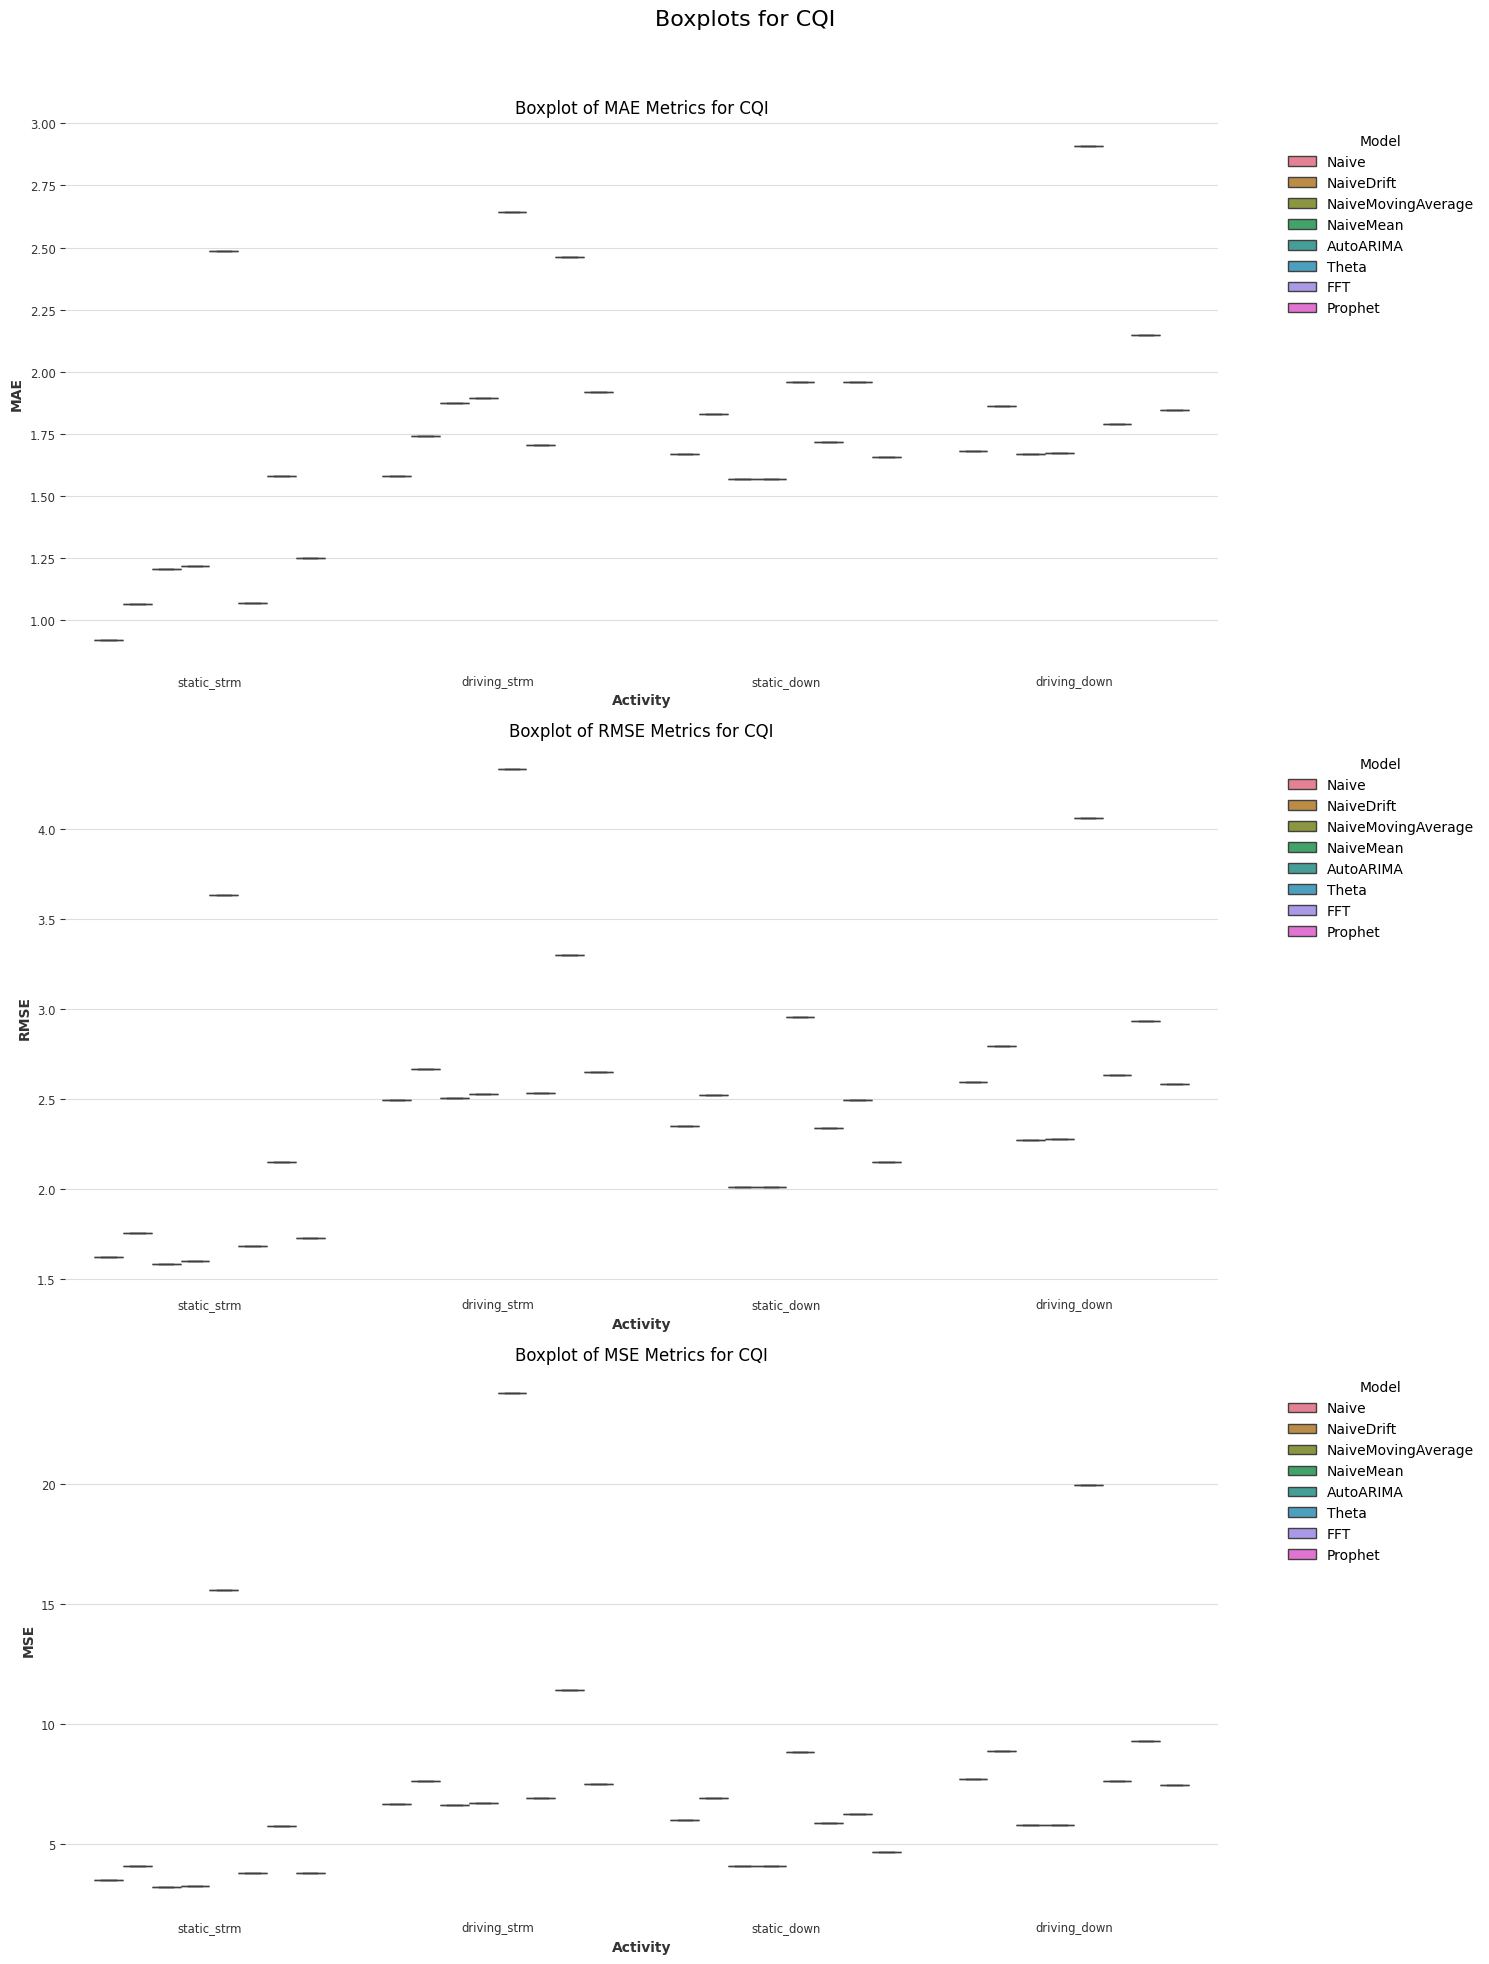

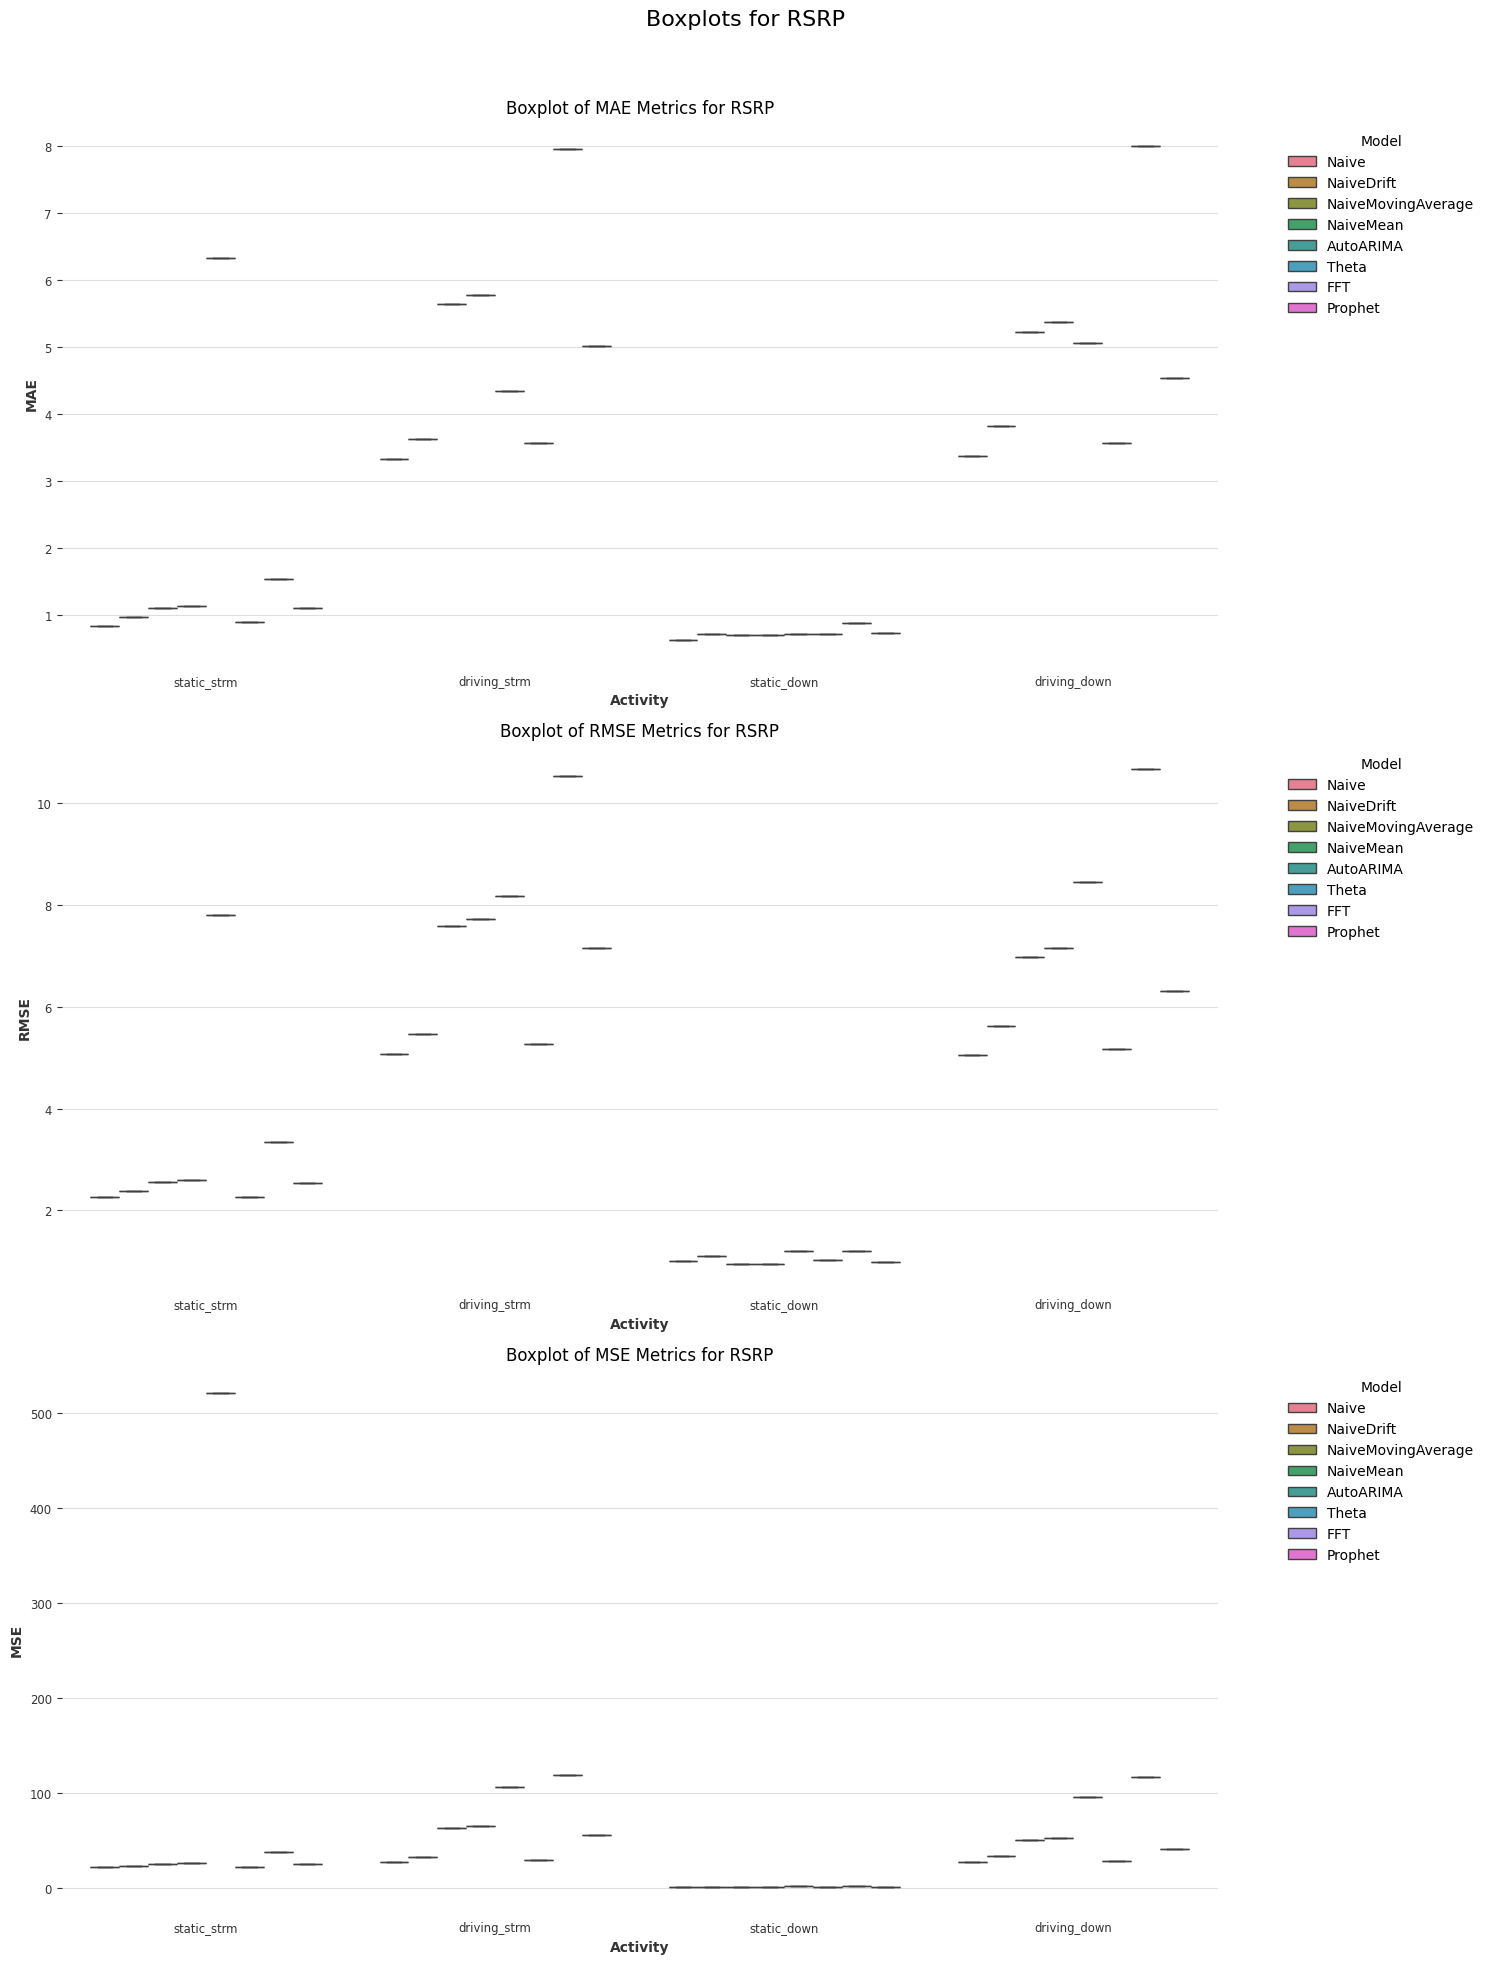

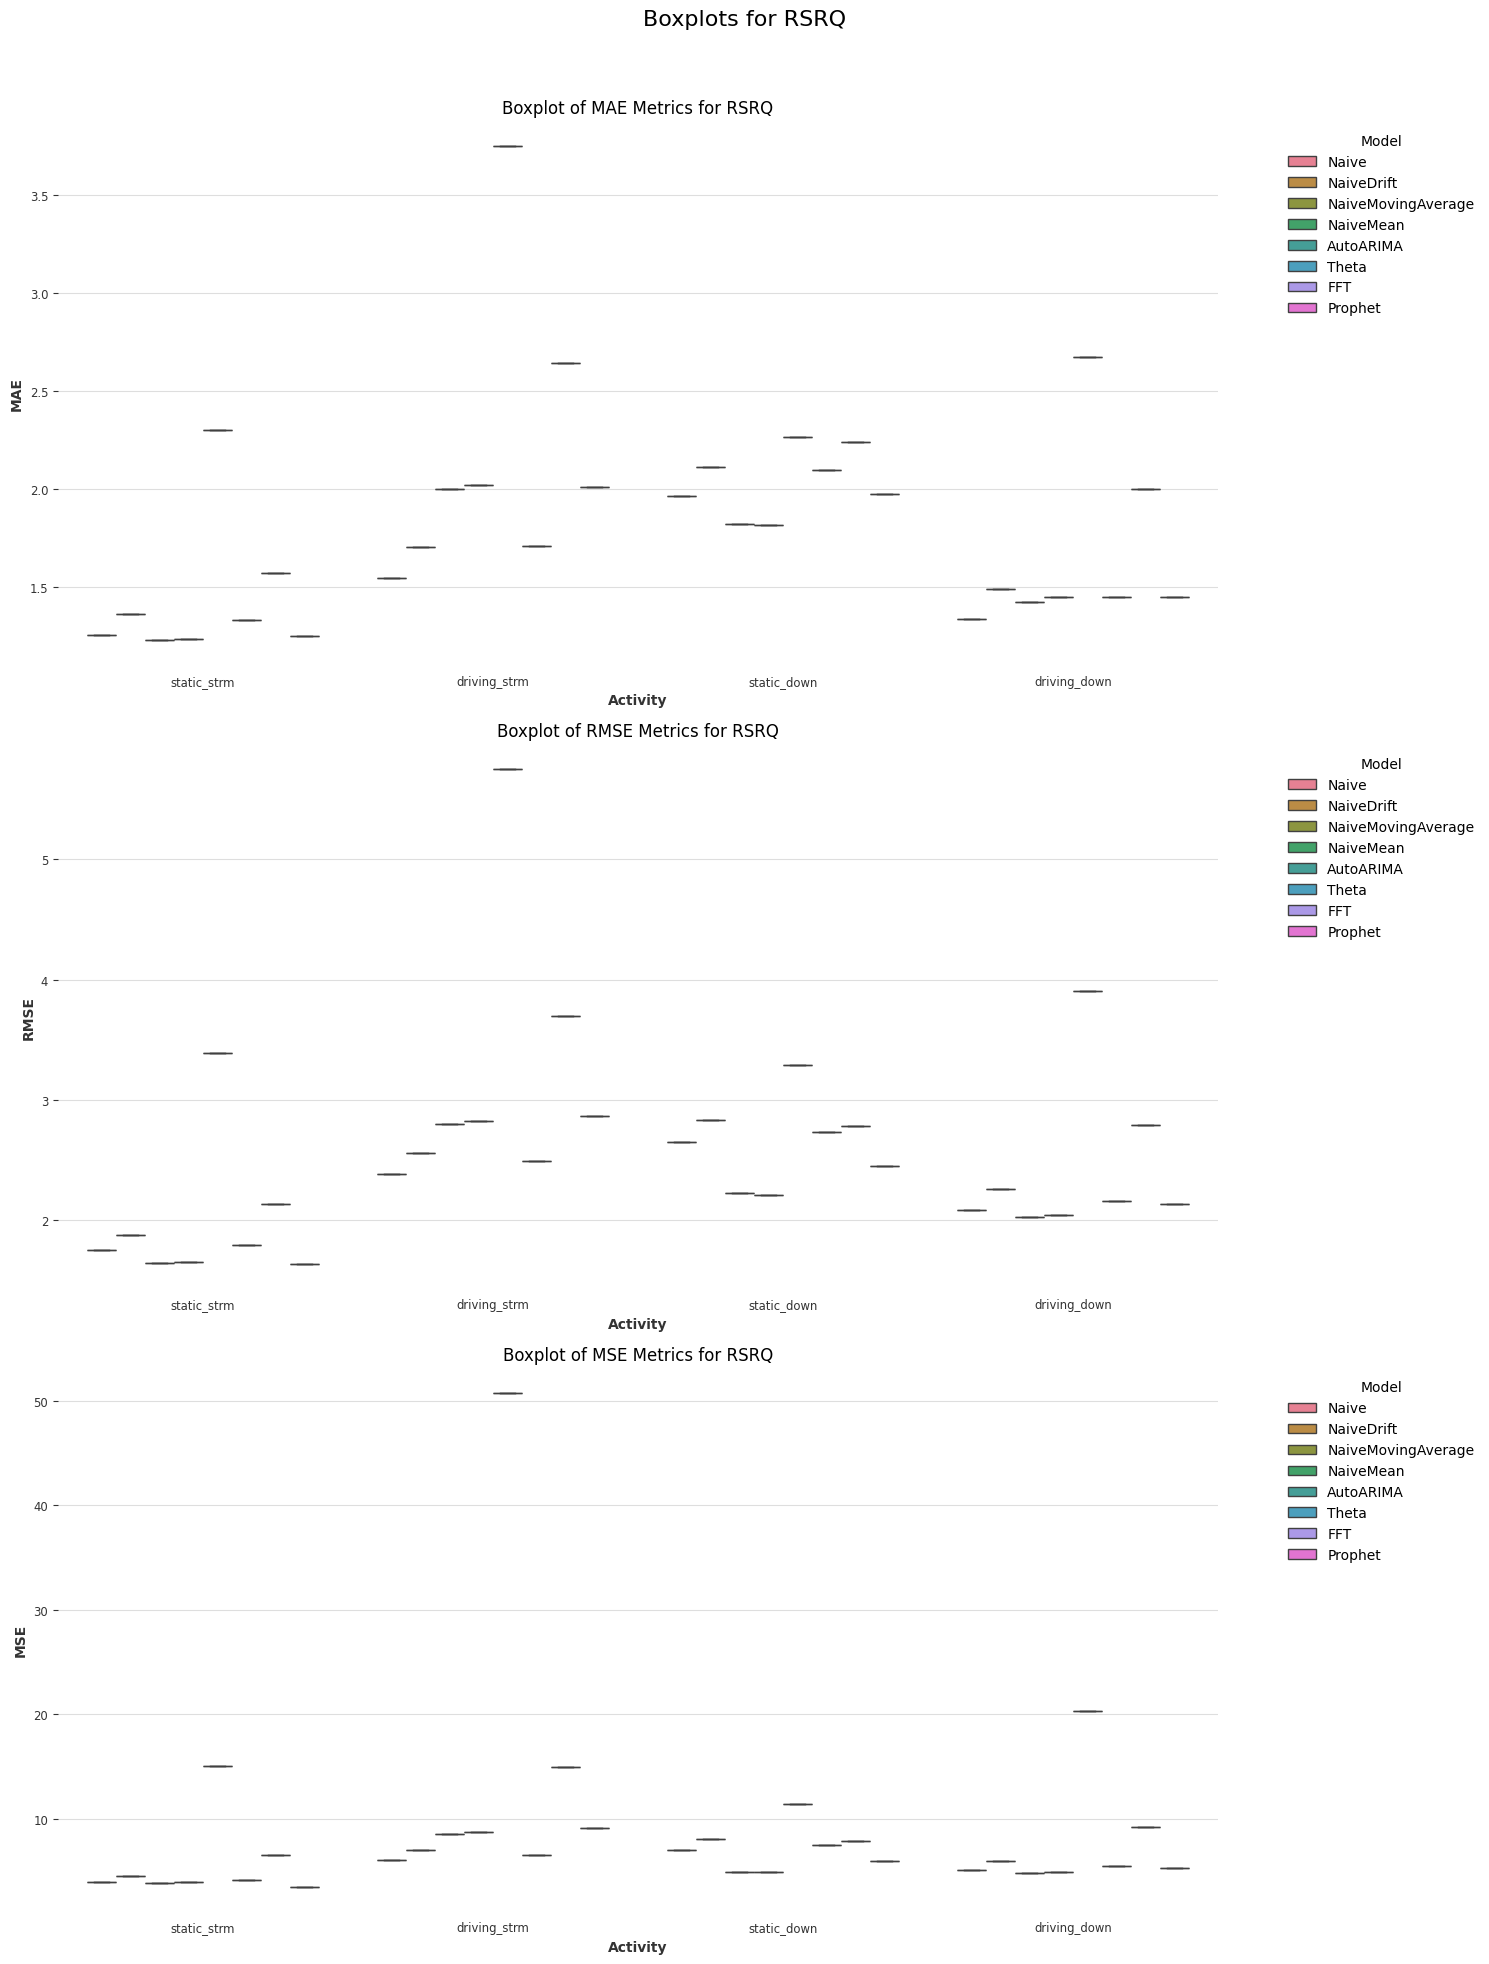

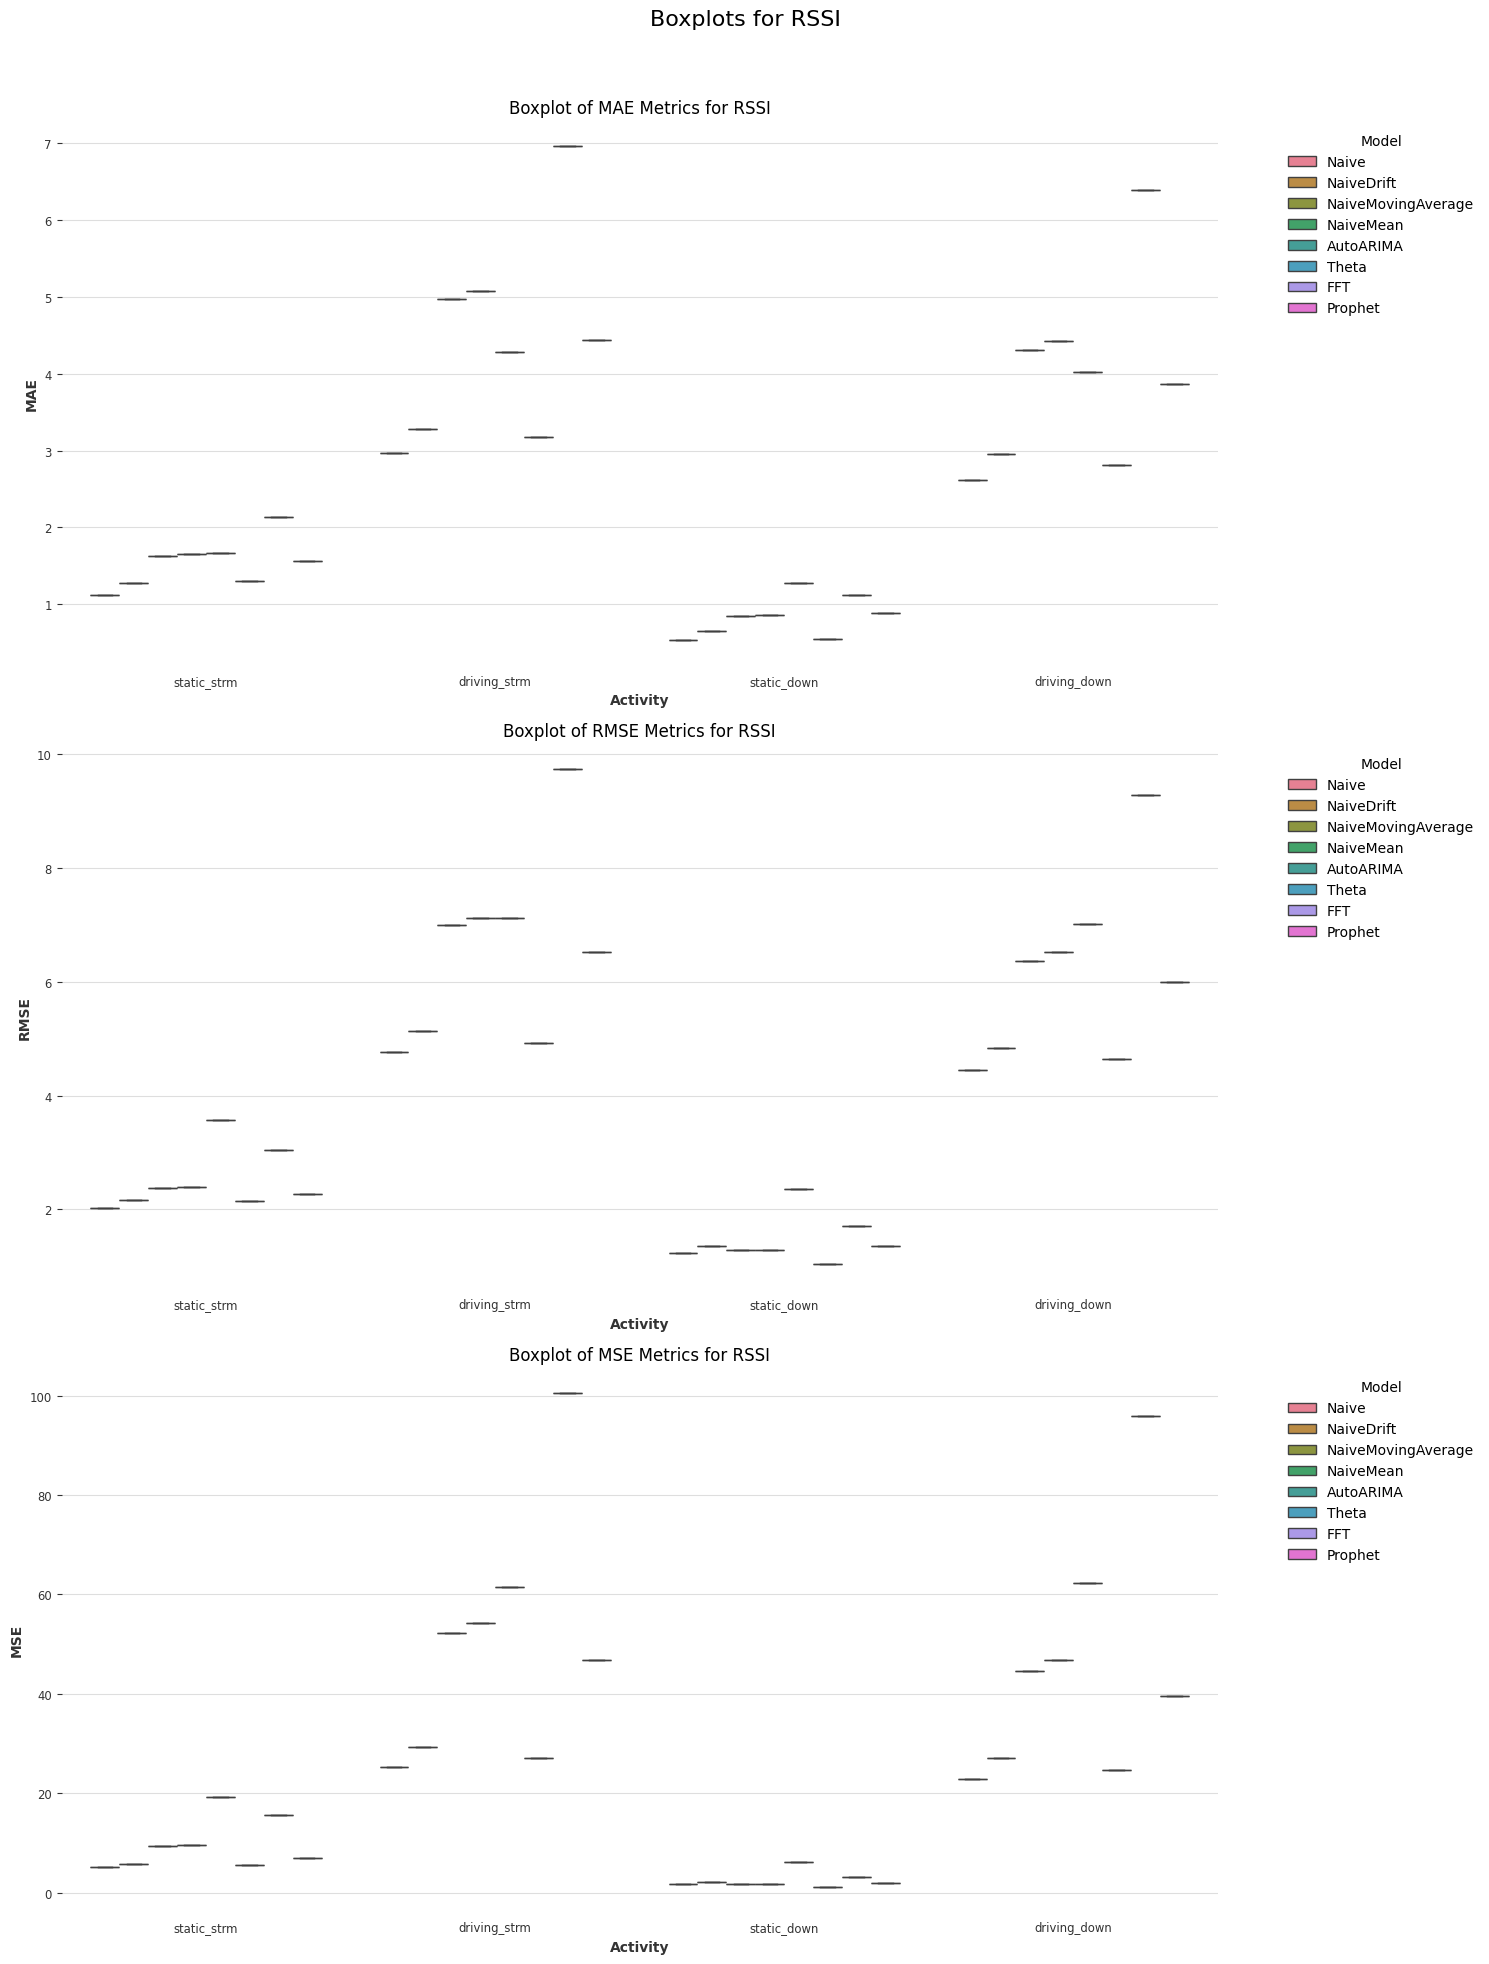

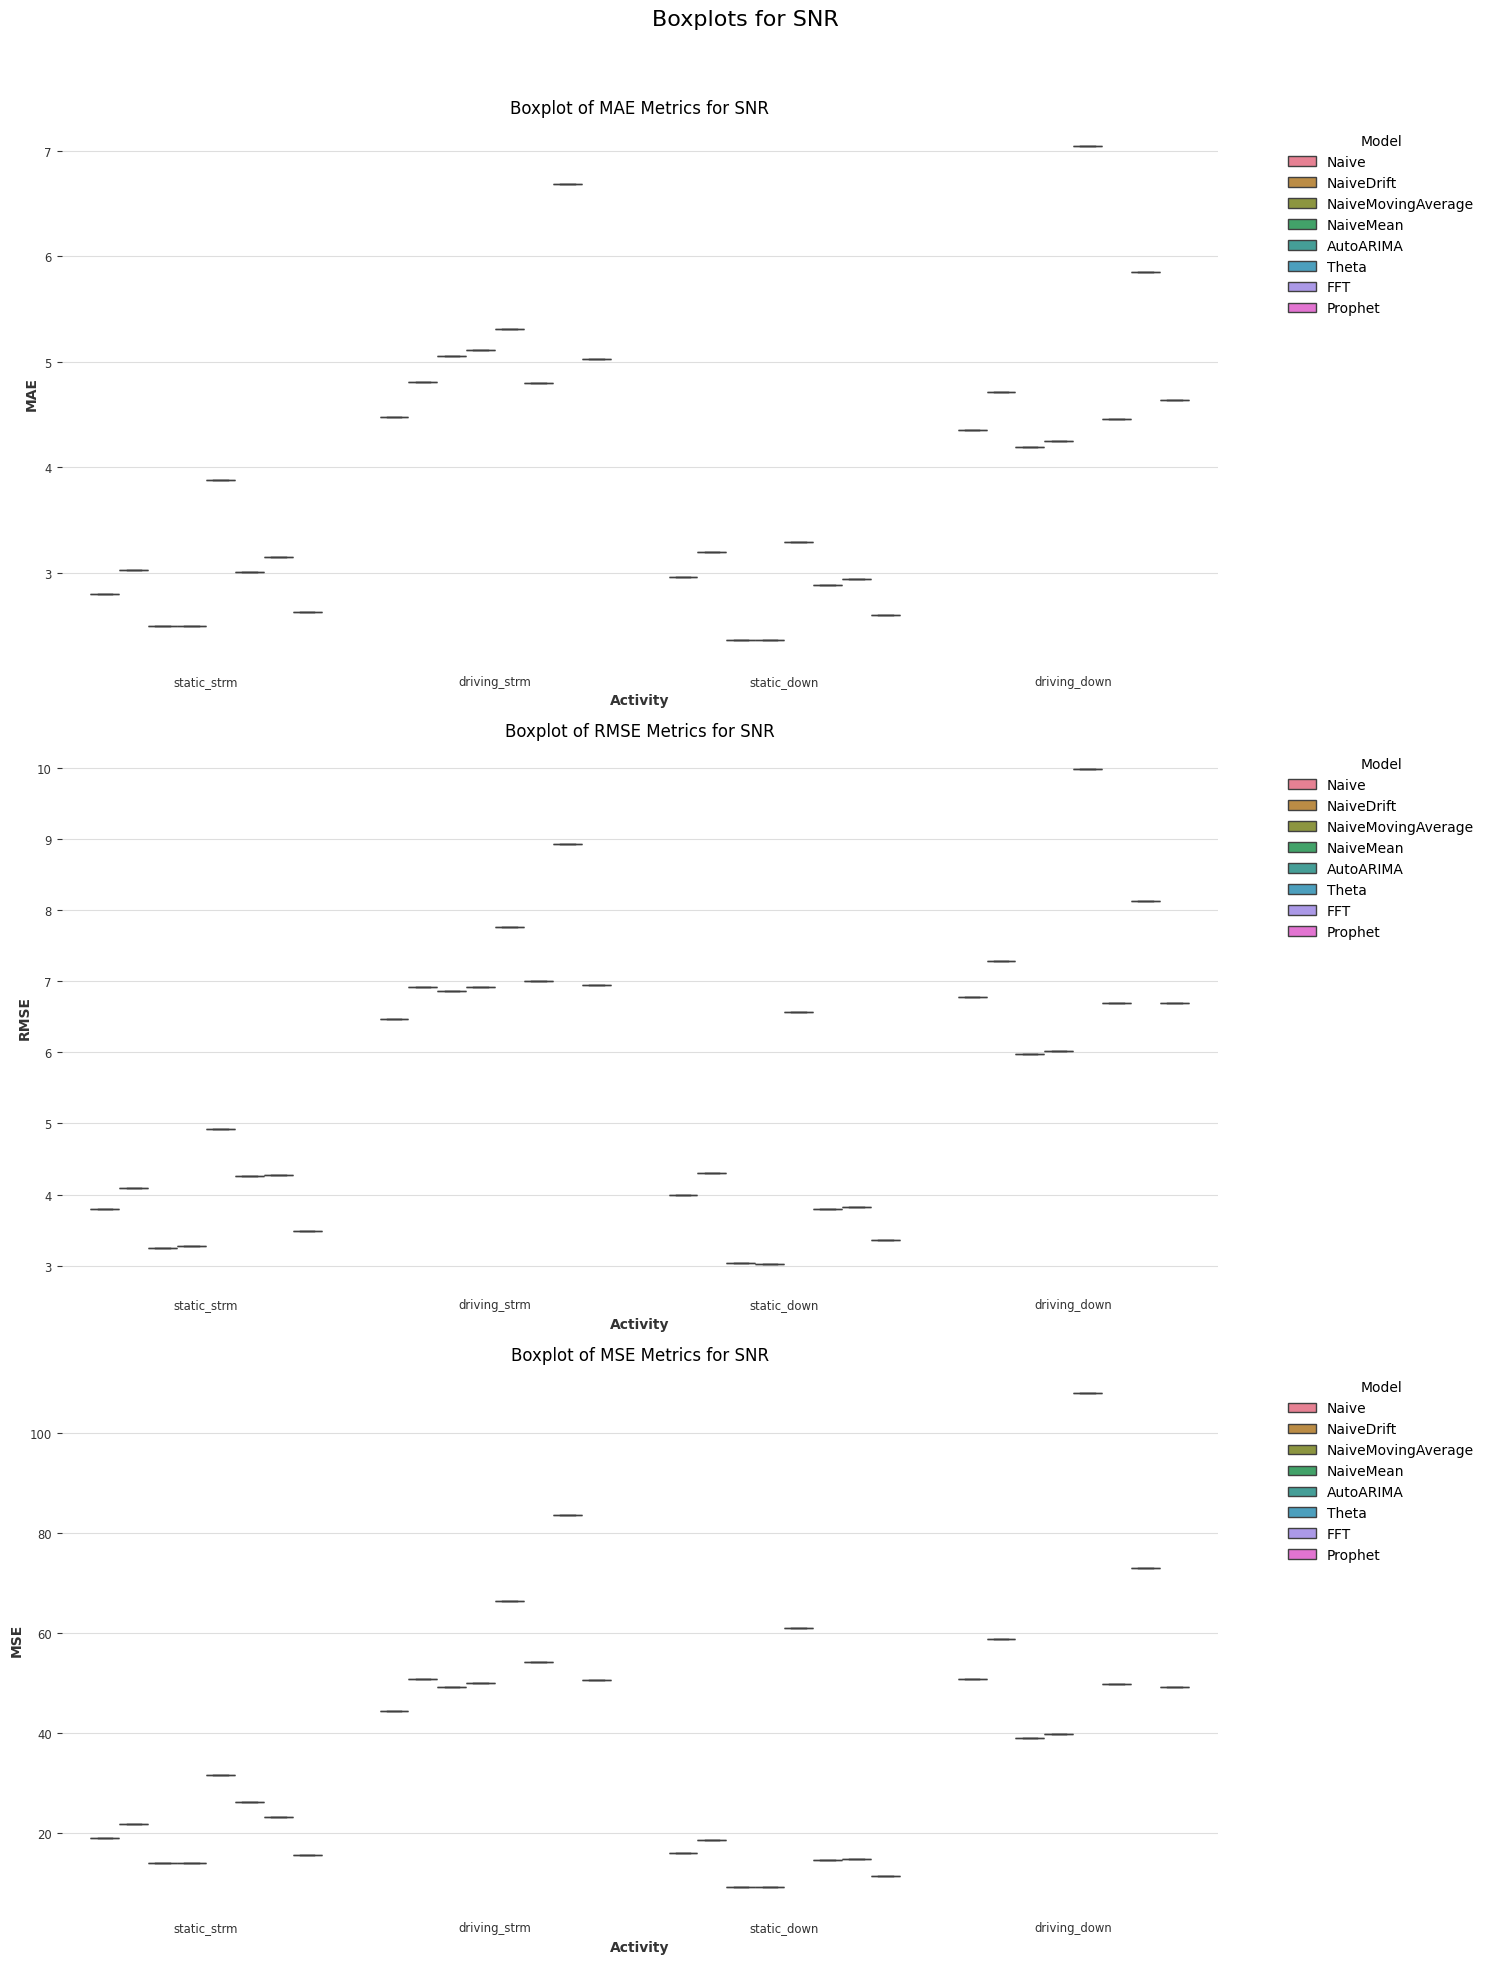

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Group the data by 'Model' and 'target'
data = df.reset_index()

data = data[data['Model'] != 'LinearRegression']

# Remove rows with NaN or infinite values from the dataset
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# List of targets and models
targets = data['target'].unique()
models = data['Model'].unique()

# Lists of metrics for each category
mae_metrics = ['MAE_Min', 'MAE_1Q', 'MAE_Median', 'MAE_3Q', 'MAE_Max', 'MAE_Mean']
rmse_metrics = ['RMSE_Min', 'RMSE_1Q', 'RMSE_Median', 'RMSE_3Q', 'RMSE_Max', 'RMSE_Mean']
mse_metrics = ['MSE_Min', 'MSE_1Q', 'MSE_Median', 'MSE_3Q', 'MSE_Max', 'MSE_Mean']

# Loop through the targets (CQI, RSRP, RSRQ, RSSI, SNR)
for target in targets:
    # Filter data for the current target
    data_subset = data[data['target'] == target]
    
    # Create subplots for MAE, RMSE, and MSE
    fig, axes = plt.subplots(3, 1, figsize=(15, 20))
    fig.suptitle(f'Boxplots for {target}', fontsize=16)
    
    # Plot MAE metrics
    sns.boxplot(data=data_subset, x='Activity', y='MAE_Mean', hue='Model', ax=axes[0])
    axes[0].set_title(f'Boxplot of MAE Metrics for {target}')
    axes[0].set_ylabel('MAE')
    axes[0].legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot RMSE metrics
    sns.boxplot(data=data_subset, x='Activity', y='RMSE_Mean', hue='Model', ax=axes[1])
    axes[1].set_title(f'Boxplot of RMSE Metrics for {target}')
    axes[1].set_ylabel('RMSE')
    axes[1].legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot MSE metrics
    sns.boxplot(data=data_subset, x='Activity', y='MSE_Mean', hue='Model', ax=axes[2])
    axes[2].set_title(f'Boxplot of MSE Metrics for {target}')
    axes[2].set_ylabel('MSE')
    axes[2].legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
    plt.show()

In [ ]:
plot_box_for_row(df.iloc[0])

# Lendo os resultados das métricas geradas por um modelo

In [30]:
result_df = pd.read_parquet(os.path.join(os.pardir, "data", "results", "uni_Naive_static_strm.parquet"))

In [31]:
result_df

,Time_Index,Model,Actuals,Preds,ElapsedTime,target
0,"[2020-01-06T11:09:02.000000000, 2020-01-06T11:...",Naive,"[-97.0, -97.0, -97.0, -97.0, -97.0, -97.0, -97...","[-97.0, -97.0, -97.0, -97.0, -97.0, -97.0, -97...",0.134088,RSRP
1,"[2020-01-06T11:09:02.000000000, 2020-01-06T11:...",Naive,"[-11.0, -11.0, -11.0, -11.0, -11.0, -11.0, -11...","[-11.0, -11.0, -11.0, -11.0, -11.0, -11.0, -11...",0.131251,RSRQ
2,"[2020-01-06T11:09:02.000000000, 2020-01-06T11:...",Naive,"[-7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7....","[-7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7....",0.130644,SNR
3,"[2020-01-06T11:09:02.000000000, 2020-01-06T11:...",Naive,"[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14....","[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14....",0.133070,CQI
4,"[2020-01-06T11:09:02.000000000, 2020-01-06T11:...",Naive,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.130511,RSSI
...,...,...,...,...,...,...
85,"[2019-11-26T13:51:38.000000000, 2019-11-26T13:...",Naive,"[-100.0, -105.0, -105.0, -104.0, -104.0, -104....","[-100.0, -100.0, -100.0, -100.0, -100.0, -100....",0.216887,RSRP
86,"[2019-11-26T13:51:38.000000000, 2019-11-26T13:...",Naive,"[-10.0, -12.000000000000002, -12.0000000000000...","[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -10...",0.216159,RSRQ
87,"[2019-11-26T13:51:38.000000000, 2019-11-26T13:...",Naive,"[7.000000000000002, -5.0, -5.0, 3.000000000000...","[7.000000000000002, 7.000000000000002, 7.00000...",0.216515,SNR
88,"[2019-11-26T13:51:38.000000000, 2019-11-26T13:...",Naive,"[12.0, 12.0, 10.0, 13.0, 13.0, 13.0, 13.0, 13....","[13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13....",0.216460,CQI


## Um gráfico de comparação entre o resultado actual vs forescat em uma das sliding windows

In [32]:
def plot_actual_vs_preds(result_df: pd.DataFrame, row_number: int) -> None:
    """
    Plota as séries temporais reais versus as predições para uma linha específica do DataFrame.

    Args:
        result_df (pd.DataFrame): DataFrame contendo as colunas "Time_Index", "Actuals" e "Preds".
        row_number (int): Número da linha do DataFrame para plotar.
    """
    # Verifica se o índice da linha está dentro dos limites do DataFrame
    if row_number >= len(result_df):
        raise IndexError(f"row_number {row_number} está fora dos limites do DataFrame.")

    # Obtém os dados da linha especificada
    time_index = pd.DatetimeIndex(result_df["Time_Index"][row_number])
    actuals = result_df["Actuals"][row_number]
    preds = result_df["Preds"][row_number]

    # Cria séries temporais para os dados reais e predições
    ts_actuals = TimeSeries.from_times_and_values(time_index, actuals)
    ts_preds = TimeSeries.from_times_and_values(time_index, preds)

    # Plota as séries temporais
    plt.figure(figsize=(14, 7))
    ts_actuals.plot(label="Reais", color="blue")
    ts_preds.plot(label="Predições", color="red")

    # Adiciona título, legendas e labels
    plt.title(f"Comparação entre Reais e Predições - Linha {row_number}")
    plt.xlabel("Data/Hora")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

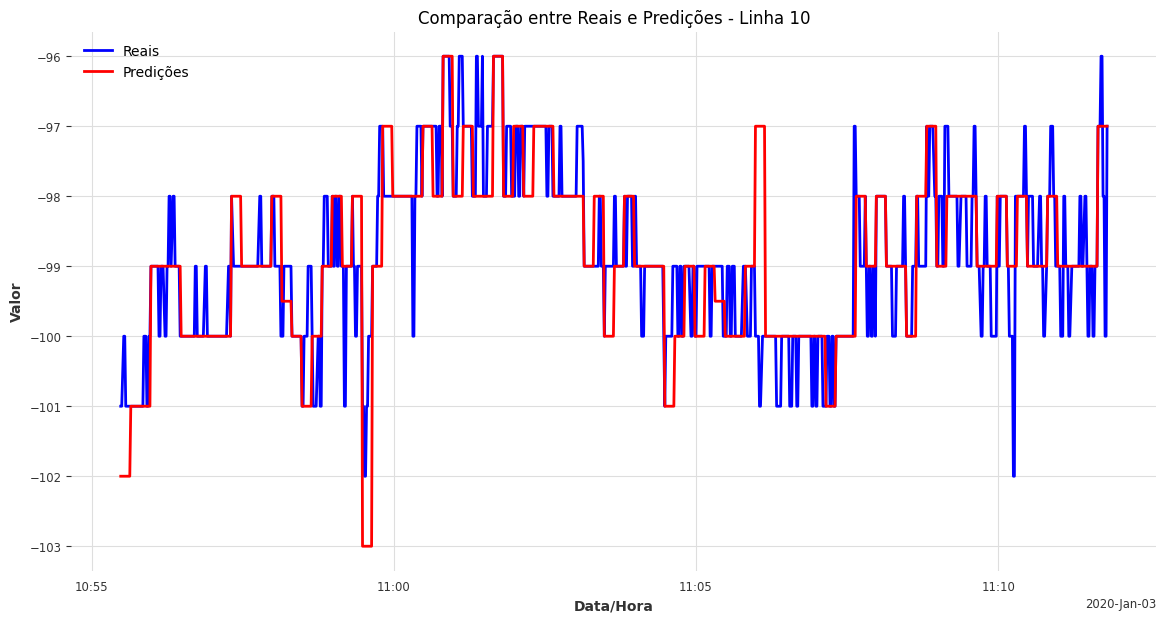

In [33]:
# Exemplo de uso
plot_actual_vs_preds(result_df, 10)